In [1]:
# !pip list

In [2]:
# # installing dependencies
# ! pip install -U pandas pandas-profiling scikit-learn --no-cache-dir

In [3]:
import pandas as pd
import pandas_profiling

/home/ashik/Downloads/everythingElse/ReliSource/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_19338/3826459295.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [4]:
# Read the CSV file into a DataFrame
train_data =  pd.read_csv('data/train.csv')
train_data

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,A 0,B0,C2,D1,100,E1,F2,237000
1,1,A1,B0,C11,D4,100,E4,F2,86193
2,2,A0,B0,C18,D0,0,E0,F2,169200
3,3,A2,B0,C11,D1,100,E1,F2,58000
4,4,A0,B0,C67,D1,0,E1,F2,235000
...,...,...,...,...,...,...,...,...,...
2623,2623,A1,B0,C2,D1,0,E1,F2,102100
2624,2624,A0,B0,C8,D1,0,E1,F2,129300
2625,2625,A0,BO,C7,D1,100,E1,F2,275300
2626,2626,A0,B0,C11,D1,100,E1,F2,150000


In [5]:
train_data.head()

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,A 0,B0,C2,D1,100,E1,F2,237000
1,1,A1,B0,C11,D4,100,E4,F2,86193
2,2,A0,B0,C18,D0,0,E0,F2,169200
3,3,A2,B0,C11,D1,100,E1,F2,58000
4,4,A0,B0,C67,D1,0,E1,F2,235000


In [6]:
# ummary statistics of the numerical columns:
train_data.describe()

,UID,col_4,y
count,2628.000000,2628.000000,2628.000000
mean,1313.500000,46.308980,137642.657154
std,758.782578,48.558188,62886.926575
min,0.000000,0.000000,5132.000000
25%,656.750000,0.000000,95000.000000
50%,1313.500000,0.000000,135000.000000
75%,1970.250000,100.000000,176325.000000
max,2627.000000,100.000000,423000.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UID     2628 non-null   int64 
 1   col_0   2489 non-null   object
 2   col_1   2542 non-null   object
 3   col_2   2628 non-null   object
 4   col_3   2628 non-null   object
 5   col_4   2628 non-null   int64 
 6   col_5   2628 non-null   object
 7   col_6   2516 non-null   object
 8   y       2628 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 184.9+ KB


In [8]:
train_data.shape

(2628, 9)

In [9]:
# Check for missing values
missing_values = train_data.isnull().sum()
print(missing_values)
# Check for missing values
total_missing_values = train_data.isnull().sum().sum()
print(f'Total missing values: {total_missing_values}')



UID        0
col_0    139
col_1     86
col_2      0
col_3      0
col_4      0
col_5      0
col_6    112
y          0
dtype: int64
Total missing values: 337


## Custome Functions

In [10]:
# Function to check if a value is a string
def is_string(value):
    return isinstance(value, str)

# Function to check if a string contains spaces
def contains_spaces(s):
    return ' ' in s

# Loop through all columns and remove trailing whitespace for string columns
# Remove spaces between words in the 'TextColumn'
# Function to remove spaces between words and remove trailing whitespace for object type columns
def rm_spaces(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':  # Check if the column contains strings
            dataframe[column] = dataframe[column].str.strip()
            dataframe[column] = dataframe[column].str.replace(' ', '')

    return dataframe


def count_string_and_non_string_values(data_frame):

    # Get a list of column names with object (string) data type
    string_columns = data_frame.select_dtypes(include=['object']).columns

    # Initialize lists to store non-string values and their locations
    non_string_values = []
    non_string_locations = []

    # Apply the function to each element in the DataFrame, count the results, and collect non-string values
    string_count = data_frame[string_columns].applymap(is_string).sum().sum()
    for col in string_columns:
        non_string_col = data_frame[col][data_frame[col].apply(lambda x: not is_string(x))]
        non_string_values.extend(non_string_col)
        non_string_locations.extend([(col, idx) for idx in non_string_col.index])

    # Return the counts and non-string values
    return {
        'Count of string values': string_count,
        'Count of non-string values': len(non_string_values),
        'Non-string values': non_string_values,
        'Non-string value locations': non_string_locations
    }

def status_of_space(dataframe):
    # Get a list of column names with object (string) data type
    string_columns = dataframe.select_dtypes(include=['object']).columns


    # Apply the function to each element in the DataFrame and count the results
    string_count = dataframe[string_columns].applymap(is_string).sum().sum()
    non_string_count = dataframe[string_columns].applymap(lambda x: not is_string(x)).sum().sum()

    # Print the counts
    print(f'Count of string values: {string_count}')
    print(f'Count of non-string values: {non_string_count}')

    # Convert mixed columns to string columns
    strdata = dataframe[string_columns].astype(str)

    # Apply the function to each element in the selected columns and sum the results
    count_with_spaces = strdata[string_columns].applymap(contains_spaces).sum().sum()

    # Print the count of strings with spaces
    print(f'Count of strings with spaces: {count_with_spaces}')

In [12]:
nan_valus_results = count_string_and_non_string_values(train_data)
print(nan_valus_results)

{'Count of string values': 15431, 'Count of non-string values': 337, 'Non-string values': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

## Before removing spaces

In [13]:
status_of_space(train_data)

Count of string values: 15431
Count of non-string values: 337
Count of strings with spaces: 471


## After removing spaces

In [14]:
train_data = rm_spaces(train_data)

status_of_space(train_data)

Count of string values: 15431
Count of non-string values: 337
Count of strings with spaces: 0


In [15]:
nan_valus_results = count_string_and_non_string_values(train_data)
print(nan_valus_results)

{'Count of string values': 15431, 'Count of non-string values': 337, 'Non-string values': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [16]:
# # Assuming you have a DataFrame named 'train_data'
# # You can export it to a CSV file named 'cleaned_train_data.csv' like this:
# train_data.to_csv('data/cleaned_train_data_removeinsidespace.csv', index=False)

# # If you want to include the index in the CSV file, remove the 'index=False' parameter.


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UID     2628 non-null   int64 
 1   col_0   2489 non-null   object
 2   col_1   2542 non-null   object
 3   col_2   2628 non-null   object
 4   col_3   2628 non-null   object
 5   col_4   2628 non-null   int64 
 6   col_5   2628 non-null   object
 7   col_6   2516 non-null   object
 8   y       2628 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 184.9+ KB


In [17]:
unique_values = train_data.nunique()
print(unique_values)


UID      2628
col_0       5
col_1       5
col_2      90
col_3      68
col_4       3
col_5      67
col_6       4
y         836
dtype: int64


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# train_data['col_4'].hist()
# plt.show()

In [43]:

# # histogram of 'Y'
# train_data['y'].hist()
# plt.show()

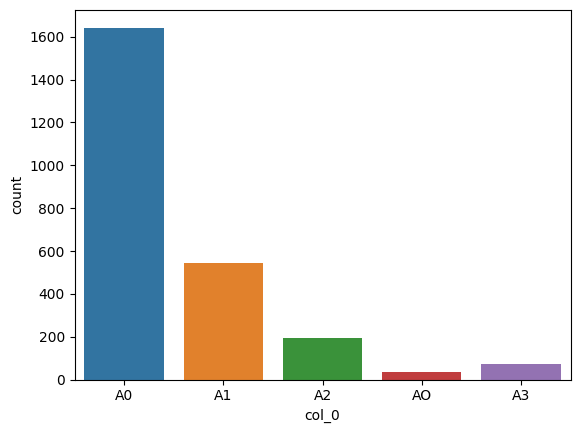

In [28]:
# Example: Visualize counts of 'col_0'
sns.countplot(data=train_data, x='col_0')
plt.show()

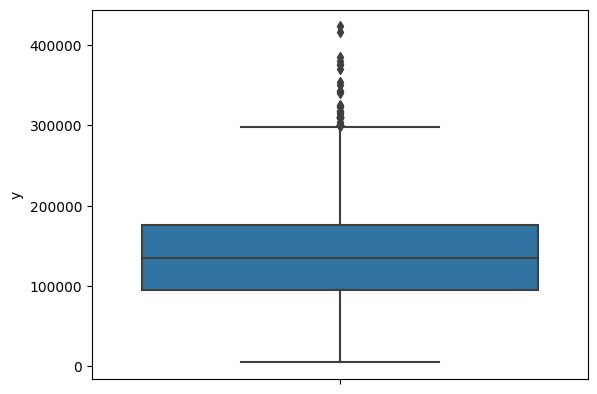

In [33]:
# Example: Visualize 'y' values using a boxplot
sns.boxplot(data=train_data, y='y')
plt.show()

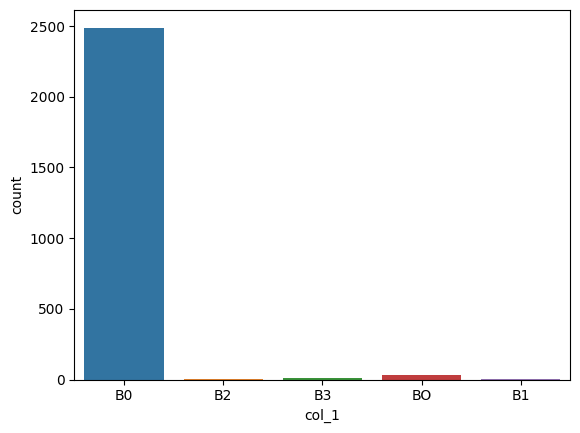

In [53]:
# Example: Visualize counts of 'col_1'
sns.countplot(data=train_data, x='col_1')
plt.show()

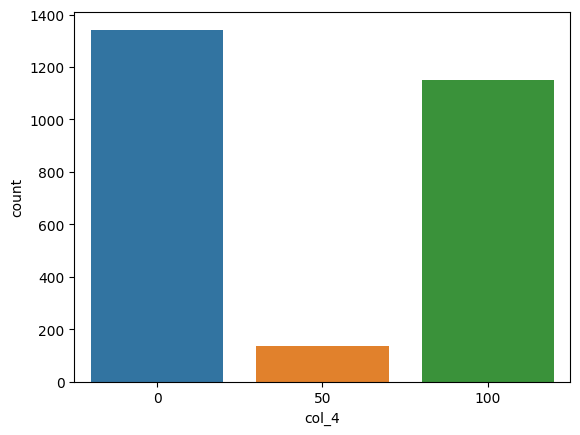

In [38]:
# Example: Visualize counts of 'col_4'
sns.countplot(data=train_data, x='col_4')
plt.show()

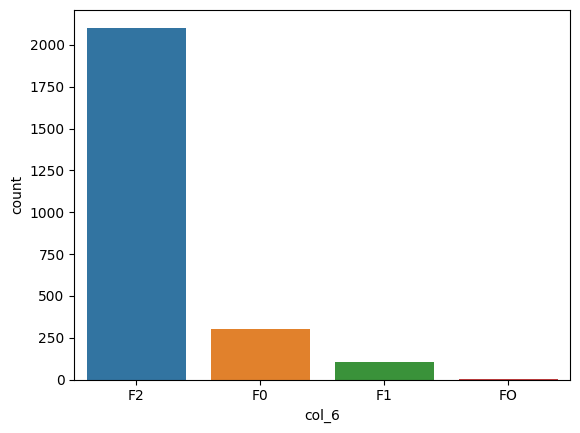

In [39]:
# Example: Visualize counts of 'col_6'
sns.countplot(data=train_data, x='col_6')
plt.show()

In [41]:
# # Example: Visualize pairwise relationships for numerical columns
# sns.pairplot(data=train_data[['col_3', 'col_4', 'col_6', 'y']])
# plt.show()

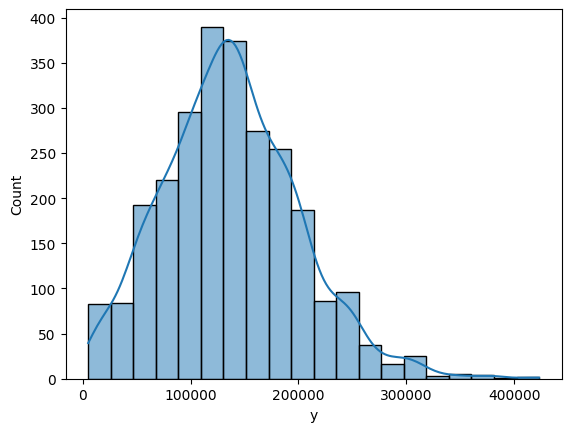

In [36]:
# Example: Visualize the distribution of 'y' values
sns.histplot(data=train_data, x='y', bins=20, kde=True)
plt.show()

In [54]:
# Replacing all 'AO' to 'A0'
train_data['col_0'] = train_data['col_0'].replace('AO', 'A0')


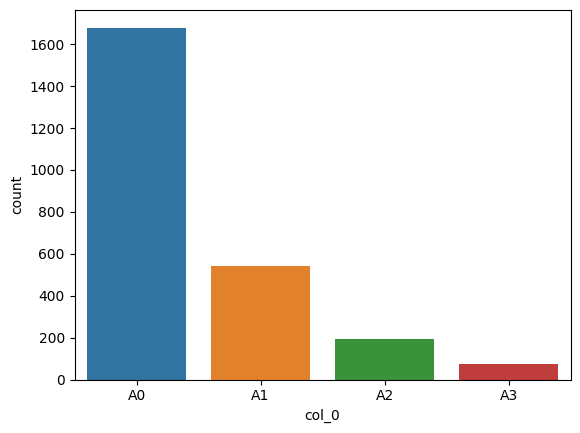

In [55]:
# Example: Visualize counts of 'col_0'
sns.countplot(data=train_data, x='col_0')
plt.show()

In [57]:
# Assuming df is your DataFrame and 'col_name' is the name of the column you want to count unique values in
unique_value_counts = train_data['col_1'].value_counts()

# Display the unique value counts
print(unique_value_counts)

col_1
B0    2489
BO      29
B3      11
B2       7
B1       6
Name: count, dtype: int64


In [60]:
# Replacing all 'BO' to 'B0'
train_data['col_1'] = train_data['col_1'].replace('BO', 'B0')

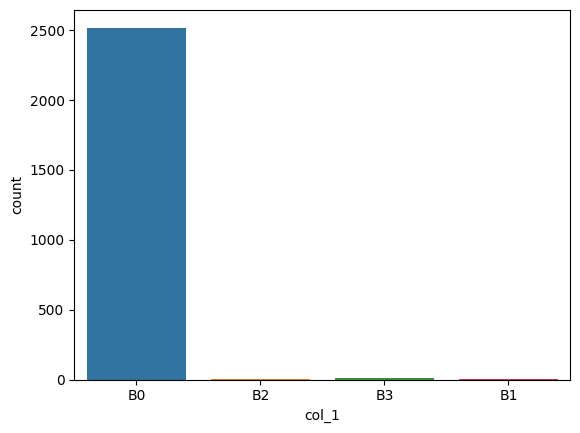

In [61]:
# Example: Visualize counts of 'col_1'
sns.countplot(data=train_data, x='col_1')
plt.show()

In [65]:
# Assuming df is your DataFrame and 'col_name' is the name of the column you want to count unique values in
unique_value_counts_col_2 = train_data['col_2'].value_counts()

# Display the unique value counts
print(unique_value_counts_col_2)

col_2
C11    728
C2     587
C4     416
C9     204
C15     77
      ... 
C62      1
C63      1
C92      1
C76      1
C66      1
Name: count, Length: 90, dtype: int64


In [ ]:
train_data['column_name'].fillna('Missing', inplace=True)